# Demystifying Dependence and Why it is Important in Causal Inference and Causal Validation

## A step-by-step guide in understanding the concept of dependence and how to apply it to validate directed acyclic graphs in causal validation using Python

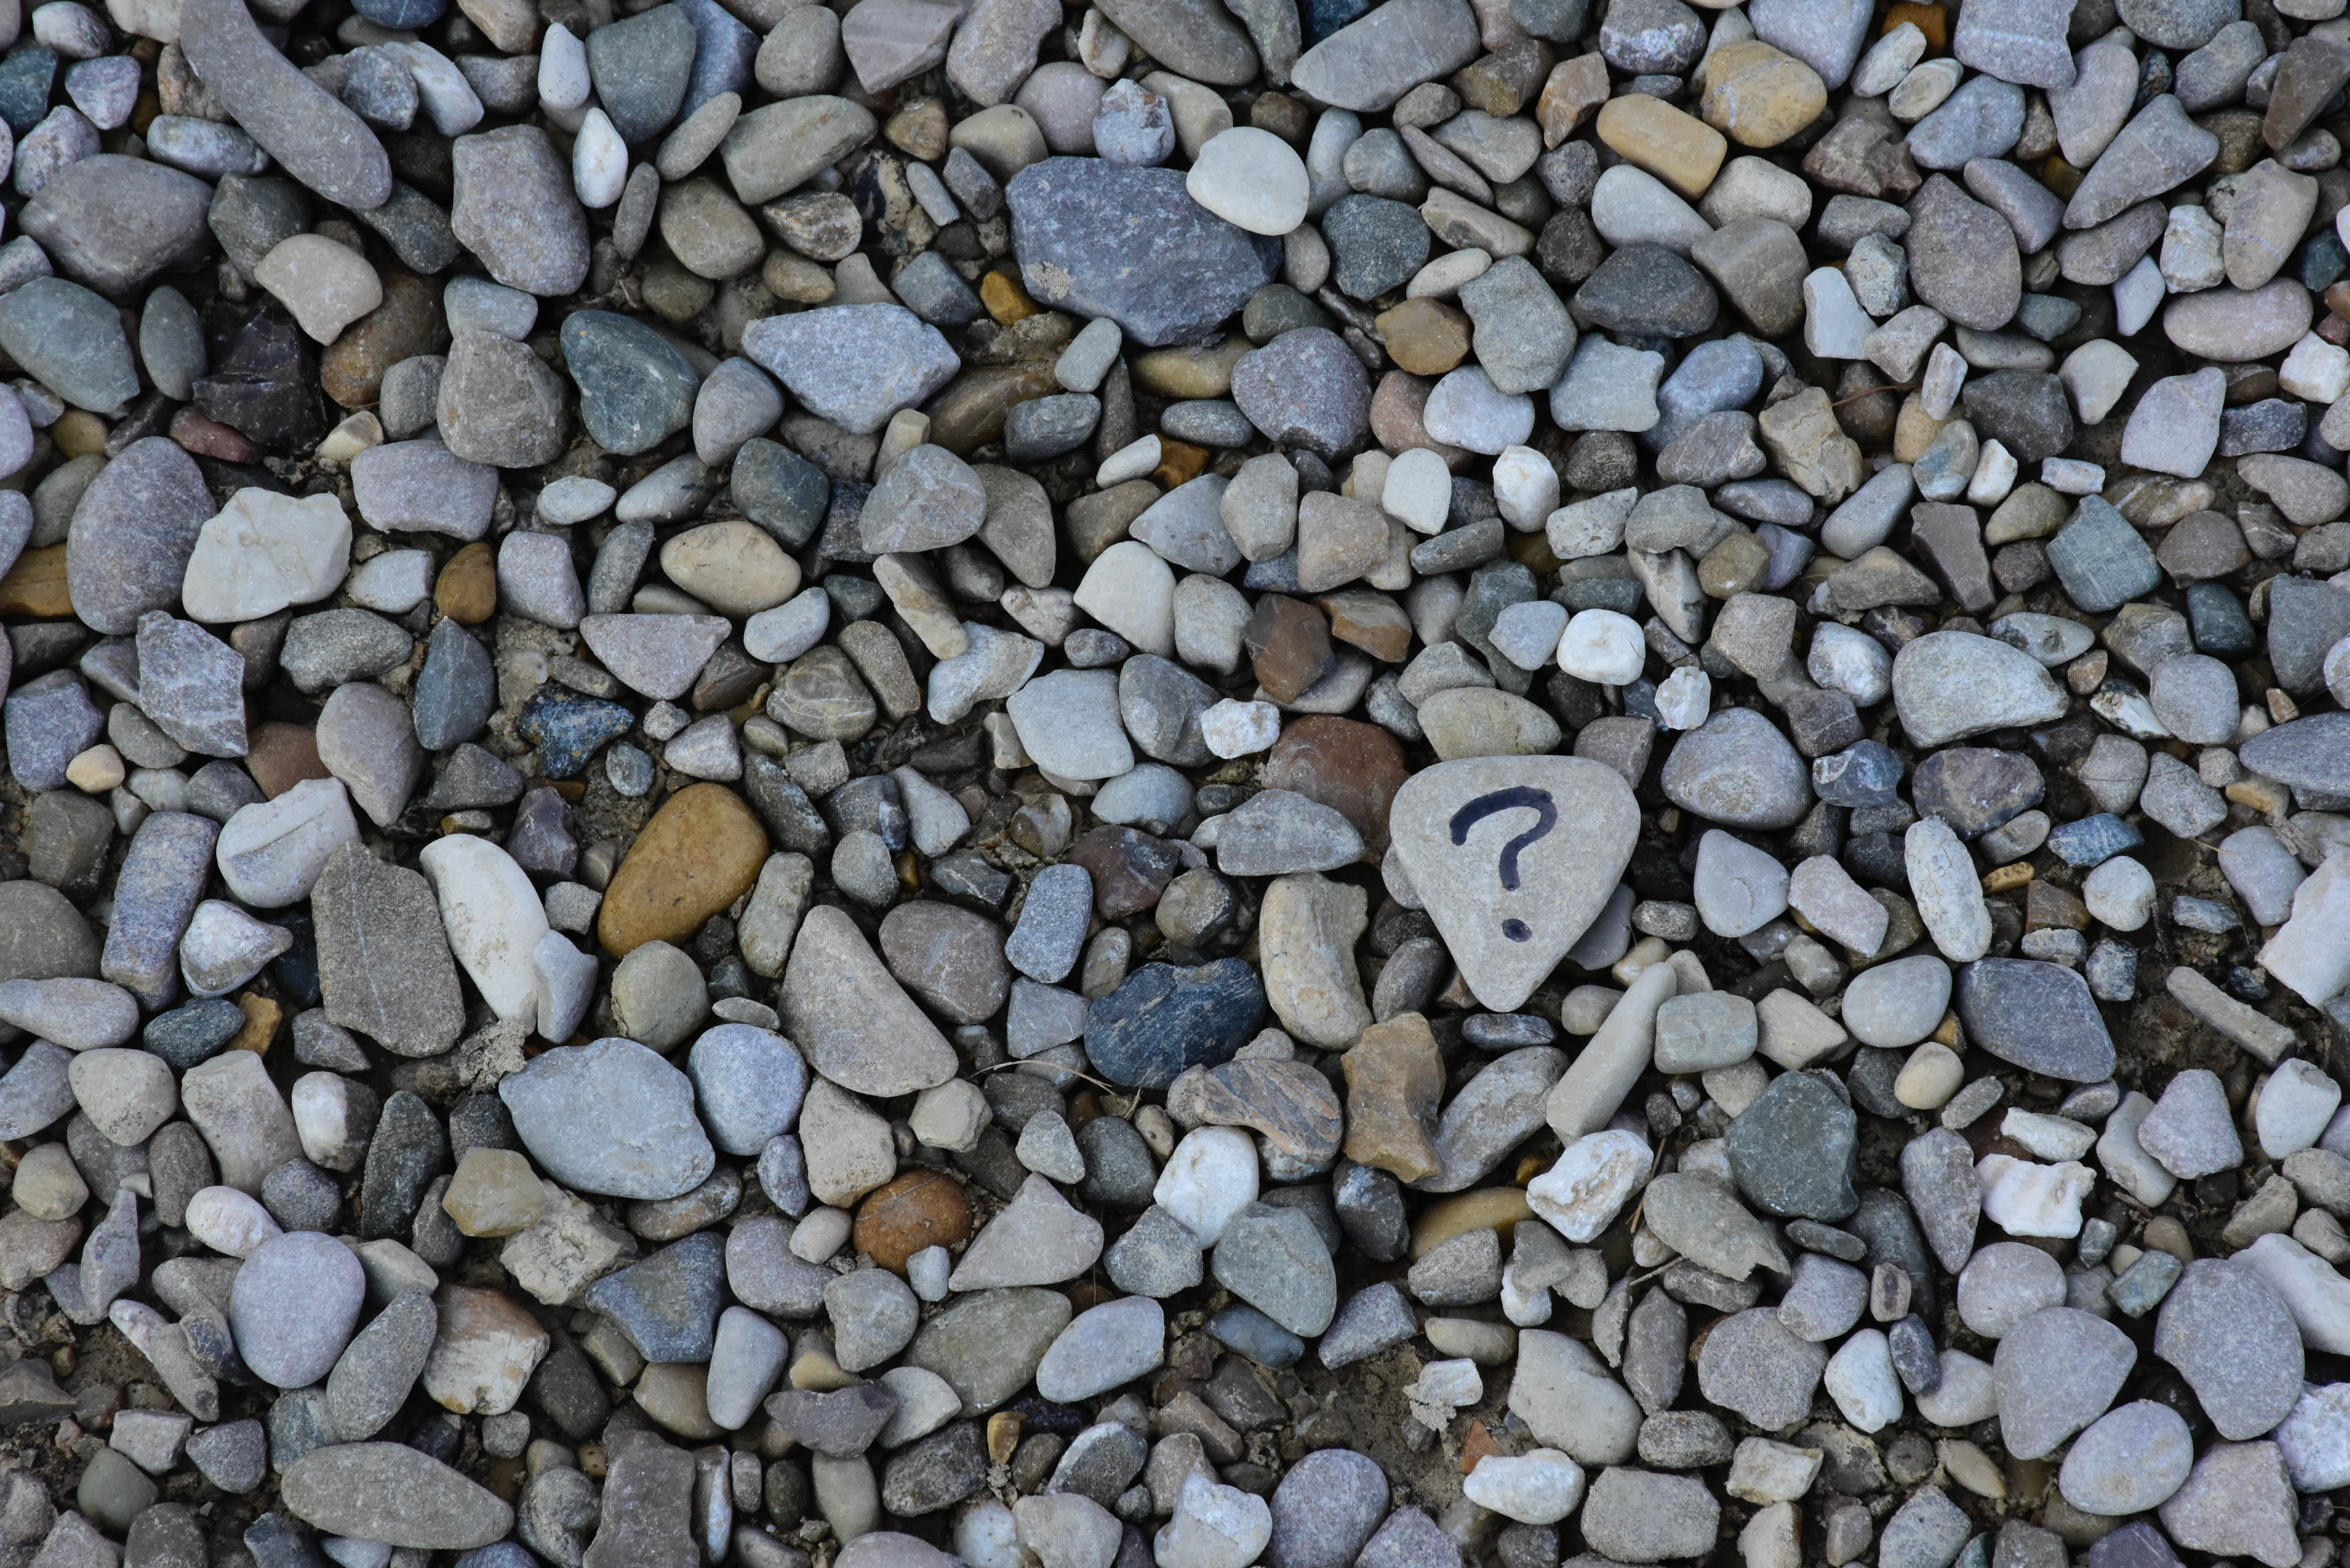
Photo by <a href="https://unsplash.com/@lamunix?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Ana Municio</a> on <a href="https://unsplash.com/photos/gray-and-brown-stones-on-gray-ground-PbzntH58GLQ?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

## Introduction
Causal Inference is an emergent branch of data science concerned with determining the cause-and-effect relationship between events and outcomes and it has the potential to significantly add to the value that machine learning can generate for organisations.

For example, a traditional machine learning algorithm can predict which loan customers are likely to default thereby enabling proactive intervention with customers. However, although this algorithm will be useful to reduce loan defaults, it will have no concept of why they occurred and whilst pro-active intervention is useful knowing the reasons for defaults would enable the underlying cause to be addressed. In this world pro-active intervention may no longer be necessary because the factors that lead to defaulting have been permanently cured.

This is the promise of Causal Inference and why it has the potential to deliver significant impact and outcomes to those organisations that can harness that potential.

There are a number of different approaches but the most common approach typically starts by augmenting the data with a "Directed Acyclic Graph" which encapsulates and visualises the causal relationships in the data and then uses causal inference techniques to ask "what-if" type questions.

### The Problem
A Directed Acyclic Graph (DAG) that encapsulates the causal relationships in the data is typically constructed manually (or semi-manually) by data scientists and domain experts working together. Hence the DAG could be wrong which would invalidate any causal calculations leading to flawed conclusions and potentially incorrect decisions.

### The Opportunity
A range of techniques exist for "Causal Validation" (the process of validating the DAG against the data) and if these techniques work they can minimise or elliminate errors in the DAG thereby ensuring that the calculations and conclusions are error-free.

### The Way Forward
The statistical concept of dependence between random variables can be used to ascertain whether a relationship that exists in the DAG also exists in the data; if it does exist the DAG is more likely to be correct and if not it is more likely to be incorrect.

## Getting Started

We are going to need an example DAG to work through the problem which has enough nodes and links to enable a deep exploration of causal validation ...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import copy as cp
from icecream import ic

from statsmodels.formula.api import ols
from itertools import combinations
import random

import sys
sys.path.insert(1, r'C:\\Users\\GHarr\\OneDrive - Lincoln College\\Python Projects\Data Science\\ghlibrary')

from dag_tools import DirectedAcyclicGraph
from causal_tools import CausalModel
import dataframe_tools

ic.enable()

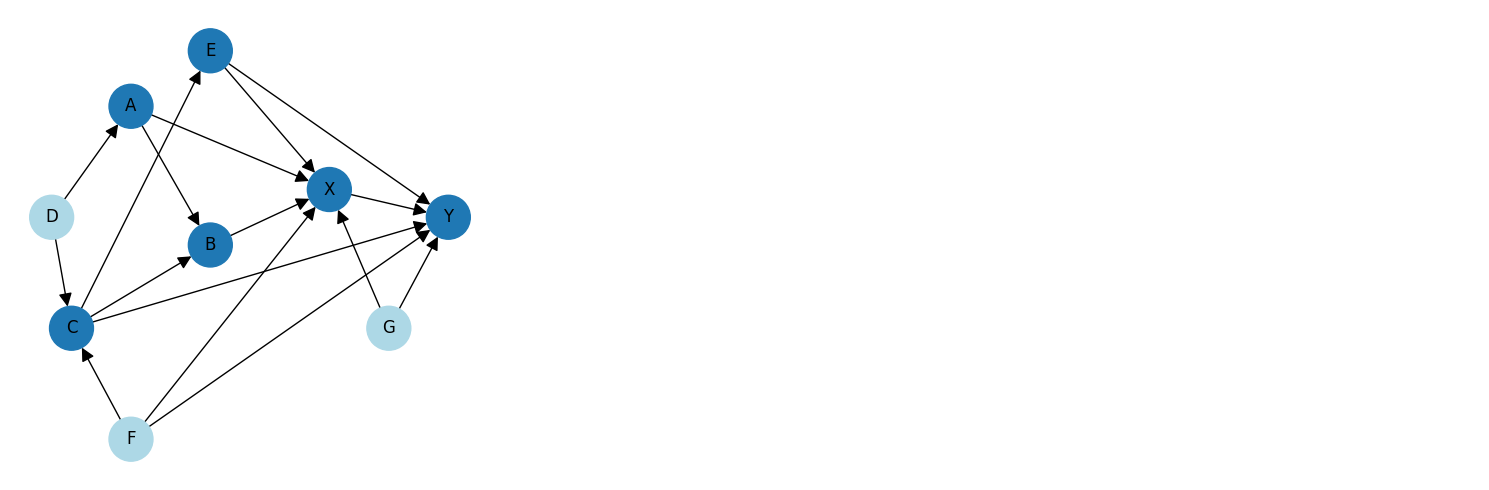

In [2]:
example_dag = DirectedAcyclicGraph.example_dags()["book_of_why_smoking_asthma_2"]
#print(example_dag["description"])

dag = example_dag["dag"]
dag.draw(grid_size=3)

The nodes in the example DAG represent the following -

- A : Parental Smoking
- B : Childhood Asthma
- C : Underlying Atopy
- D : Parental Asthma
- E : Chronic Bronchitis
- F : Sex
- G : Socio-economic Status
- X : Smoking
- Y : Asthma

Each node in a DAG is either having a causal effect on other node(s) or other node(s) are having a causal effect on it and the direction of the arrow is the direction of the causal effect. For example, one of the causes of childhood asthma (node B) is underlying atopy (node C) and one of the causes for underlying atopy is sex (node F).

Note that the light-blue nodes have no inputs (exogenous in causal terminology) and the dark-blue nodes have one or more inputs (endogenous in the terminology).

We will also need some data that matches the DAG. The dataset below is entirely synthetic and has been generated by the author; it exactly encapsulates and matches the structure suggested by the DAG and contains no erroneous or faulty relationships ...

In [3]:
causal_model = CausalModel(dag=dag, random_state=42)
causal_model.fit(X = None)

df_asthma = causal_model.data
df_asthma

ic| 'CausalModel.fit'
ic| expr_str: 'A = 2 x D + ε'
ic| expr_str: 'C = -3 x D + -2.5 x F + ε'
ic| expr_str: 'B = -3 x A + -3 x C + ε'
ic| expr_str: 'E = 3 x C + ε'
ic| expr_str: 'X = 1.5 x A + -3 x B + 3 x E + -1.5 x F + 2 x G + ε'
ic| expr_str: 'Y = 3 x C + 3 x E + 2 x F + 2.5 x G + 1.5 x X + ε'


D         F         G          A          C          B          E  \
0    5.634316  1.399732  2.035583   9.914077 -24.214419  44.195973 -75.865578   
1    7.341857  0.031668  4.376354  15.308372 -22.692390  29.534663 -68.266770   
2    3.914095  2.636184  4.140724   6.044142 -15.317655  21.067061 -48.658849   
3    3.914127  2.046147  3.231601   8.811971 -16.196070  22.381185 -47.754029   
4    7.451454  3.017559  4.871805  15.313706 -31.482503  45.578518 -91.170220   
..        ...       ...       ...        ...        ...        ...        ...   
995  5.620962 -0.423221  3.966892   9.614154 -14.551332  17.128210 -39.285287   
996  3.256654  0.968543  2.019814   7.040034 -12.401946   9.879755 -44.832499   
997  5.487806 -0.158014  3.183499  10.789441 -15.028534  17.452708 -46.887088   
998  7.100604 -0.023013  3.679870  14.205608 -22.450353  21.982254 -58.815147   
999  6.174557  1.004456  6.236602  13.133185 -21.124648  19.720250 -59.600657   

              X            Y  
0   -342.413180  -604.177195  
1   -199.271975  -613.181989  
2   -163.918270  -470.942156  
3   -185.314511  -545.992623  
4   -405.028262 -1026.669754  
..          ...          ...  
995 -153.175943  -493.048433  
996 -160.515481  -326.960258  
997 -143.251753  -410.673777  
998 -215.682315  -571.397425  
999 -172.470482  -331.555539  

[1000 rows x 9 columns]

Another thing we need before we can get started is a way of extending the pandas ``DataFrame`` and ``Series`` classed with custom methods so that the code we write is clean, concise and easy to understand.

Here is a link to one of my previous artices that provides an end-to-end tutorial on how to extend datframes and why it is a useful thing to do ...

https://towardsdatascience.com/how-to-extend-pandas-dataframes-with-custom-methods-to-supercharge-code-functionality-readability-f4ae983ad715

Armed with that understanding is is easy to write two simple extension methods to establish whether a ``Series`` contains numerical or categorical data ...

In [4]:
@property
def is_categorical(self) -> bool:
    return len(self.unique()) == 2 or self.convert_dtypes().dtype in [object, bool, pd.CategoricalDtype()]

pd.Series.is_categorical = is_categorical

@property
def is_numerical(self) -> bool:
    return not self.is_categorical

pd.Series.is_numerical = is_numerical

In [5]:
df_asthma["D"].is_categorical

False

In [6]:
df_asthma["Y"].is_numerical

True

## Understanding Dependence

One definition of dependence is ...

"Dependence between two random variables means that the occurrence or value of one variable affects the occurrence or value of the other. Variables are considered dependent if the occurrence or value of one variable provides information about the occurrence or value of the other variable."

To unpack this, let's take another look at our example DAG and consider the causal factors that affect node X ...

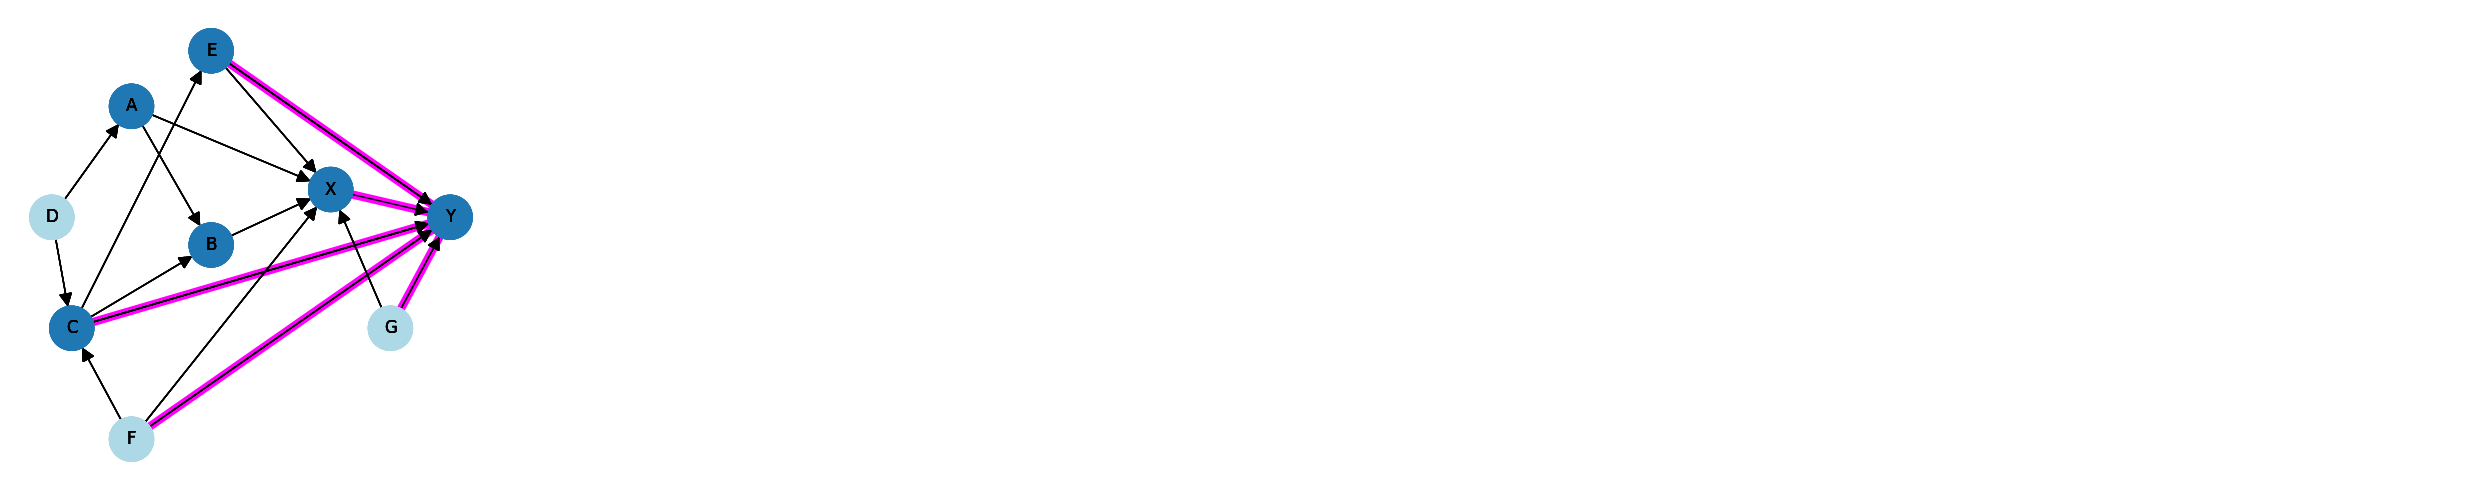

In [7]:
node = "Y"
paths = [dag.edge_to_path((parent, node)) for parent in dag.parents(node)]
dag.draw_paths(paths, cols=5, separate_charts=False)

In this visualisation we can see that node Y (Asthma) is caused by (and hence dependent on) 5 different factors - C (Underlying Atopy), E (Chronic Bronchitis), F (Sex), G (Socio-economic Status) and X (Smokinng).

Now lets take another look at the data that the DAG is representing ...

In [8]:
df_asthma.head()

D         F         G          A          C          B          E  \
0  5.634316  1.399732  2.035583   9.914077 -24.214419  44.195973 -75.865578   
1  7.341857  0.031668  4.376354  15.308372 -22.692390  29.534663 -68.266770   
2  3.914095  2.636184  4.140724   6.044142 -15.317655  21.067061 -48.658849   
3  3.914127  2.046147  3.231601   8.811971 -16.196070  22.381185 -47.754029   
4  7.451454  3.017559  4.871805  15.313706 -31.482503  45.578518 -91.170220   

            X            Y  
0 -342.413180  -604.177195  
1 -199.271975  -613.181989  
2 -163.918270  -470.942156  
3 -185.314511  -545.992623  
4 -405.028262 -1026.669754

This synthetic data set was created by the author to facilitate the article so I happen to know that the relationship between node Y and those dependent factors is as follows ...

$$
Y = 3C + 3E + 2F + 2.5G + 1.5X + ε
$$

<b>Y = 3C + 3E + 2F + 2.5G + 1.5X + ε</b>

(Note: $ε$ represents the error term)

... and this can be tested and verified by picking a row (in this case I have chosen the 3rd row) pplying that formula to the data ...

In [9]:
y = (3 * df_asthma.loc[2, "C"]) + (3 * df_asthma.loc[2, "E"]) + (2 * df_asthma.loc[2, "F"]) + (2.5 * df_asthma.loc[2, "G"]) + (1.5 * df_asthma.loc[2, "X"])
error_term = abs(df_asthma.loc[2, "Y"] - y)

print(f"Y = {y}, error term = {error_term}")

Y = -422.1827393983049, error term = 48.75941612372628


We can now see why and how Y is dependent on C, E, F, G and X; if the value of one of those dependent variables changes, the value of Y will also change. We can also see from the DAG that Y should not be dependent (for example) on node D because there is no link between D and Y.

The statement "Y is dependent on C, E, F, G and X" can be represented in a mathematical formula as follows ...

$$
% \perp is the ⊥ symbol, \!\!\! reverses 3 intervals and overlays another ⊥ giving ⫫
% \perp is ⊥ symbol then \!\!\!\!\!\! reverses 6 intervals, / is a sepeartor and finaly \ adds the slash giving ⫫̸
\providecommand{\independent}{\perp \!\!\! \perp}
\providecommand{\dependent}{\independent \!\!\!\!\!\! / \ }
\providecommand{\independentsingle}{\perp}
\providecommand{\dependentsingle}{\perp \!\!\!\!\!\! / \ }
\providecommand{\given}{\mid}
$$

$$
Y \dependent C, E, F, G, X
$$

... and the statement "Y is independent of D" is represented mathematically as follows ...

$$
Y \independent D
$$

The ⫫ symbol is called a "double up-tack" but the ⫫̸ symbol does not have a widely accepted name so I have adopted "slashed double up-tack" through personal preference. 

Some articles and texts use a single up-tack (⊥ and ⊥̸) instead of double up-tacks but double up-tacks seems to be more common hence that is the standard that I have adopted and used throughout this article and the associated Python code.

To recap then, statistical dependence between two random variables means that "the occurrence or value of one variable affects the occurrence or value of the other" and we now know how this looks visually in the DAG, how to represent it as a mathematical formula (e.g. $Y = 3C + 3E + 2F + 2.5G + 1.5X + ε$) and also how to represent it using the slashed double up-tack notation (e.g. Y ⫫̸ C, E, F, G, X).

## From Dependence to Causal Validation

Causal Inference typically starts with a set of data and then augments that data with a DAG. There are emerging techniques that can reverse engineer a DAG from tha data but they are not accurate or consistent hence the most common approach to developing a DAG is to ask the domain experts what they think the causal relationships are and then to validate or test that DAG against the data and amend it as necessary if validation fails.

The DAG has proposed that Y is dependent on C, E, F, G and X and if this dependency exists in the data then there will be confidence that the causal links pointing into node Y are valid and correct and there is a mathematical notation that can be used to represent this as follows ...

$$
Y \dependent _{_{G}} \ C, E, F, G, X \Rightarrow Y \dependent _{_{D}} \ C, E, F, G, X
$$

This scary-looking formula is actually very simple to understand. The "G" subscript of the first slashed double up-tack dependency symbol means "in the graph" (i.e. the DAG) and the second "D" subscript means "in the data" (note that I have seen a "P" subscript in some of the literature but "D" makes more sense to me so that is what I have adopted).

Armed with that knowledge, the whole formula can be read as "If Y is dependent on C, E, F, G and X in the graph then Y should also be dependent on C, E, F, G and X in the data.

It follows then that we just need a mechanism in Python that can detect dependencies in the data. That mechanism can then be used to check each node in the DAG that has in-coming connections and if dependnecis are detected in the data that match those in the DAG we can be reasonably confident that there are no spurious connections (causal links) and that the DAG is a valid representation of the data in this respect.

## Observing Dependence in the Data

Let's start by visualising the relationships that exist in the data between C, E, F, G and X and our node of interest Y ...

ic| expression: 'Y ⫫̸ C, E, F, G, X'


Y ~ C + E + F + G + X


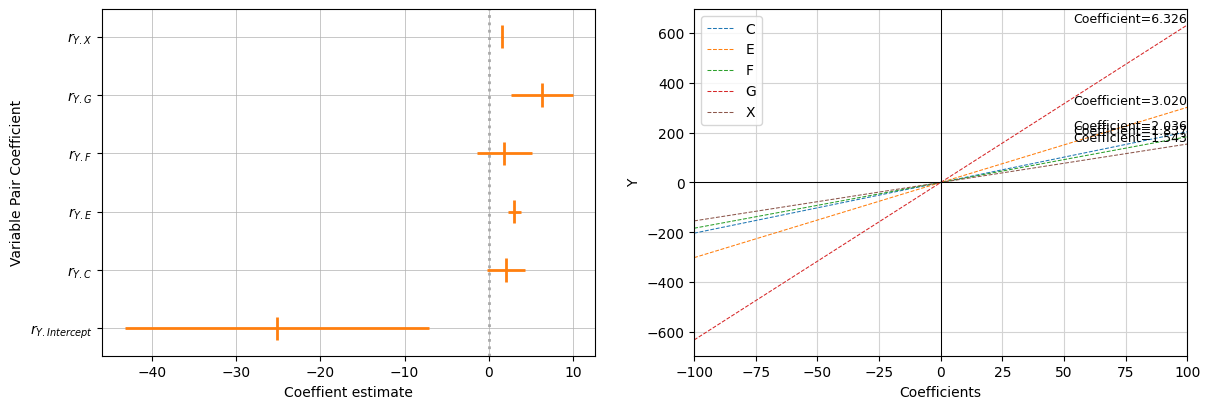

In [10]:
is_dependent, errors, ols_results = df_asthma.dependence(expression="Y ⫫̸ C, E, F, G, X", show_charts=True)

The chart on the right is plotting Y on the x axis and separate lines for C, E, F, G and X on the y axis. If Y is dependent on these other variables then changing the value of one of them should change the value of Y. This means that there should be a positive or negative co-efficient and the lines should exhibit a noticeable slope (either upwards or downwards).

Given that there are definite slopes we can see that $Y \dependent _{_{D}} \ C, E, F, G, X$ is true i.e. that Y is dependent on C, E, F, G and x <b>in the data</b>.

If however there is no dependence then changing the value of a variable would have little or no effect on Y, the co-efficient should be close to zero and the line should have no slope i.e. it should be flat.

This can be demonstrated by adding the relationship between Y and D to the chart remembering that there is no causal link from D to Y in the DAG so there shold be no relationship between Y and D in the data either ...

ic| expression: 'Y ⫫̸ C, E, F, G, X, D'


Y ~ C + E + F + G + X + D


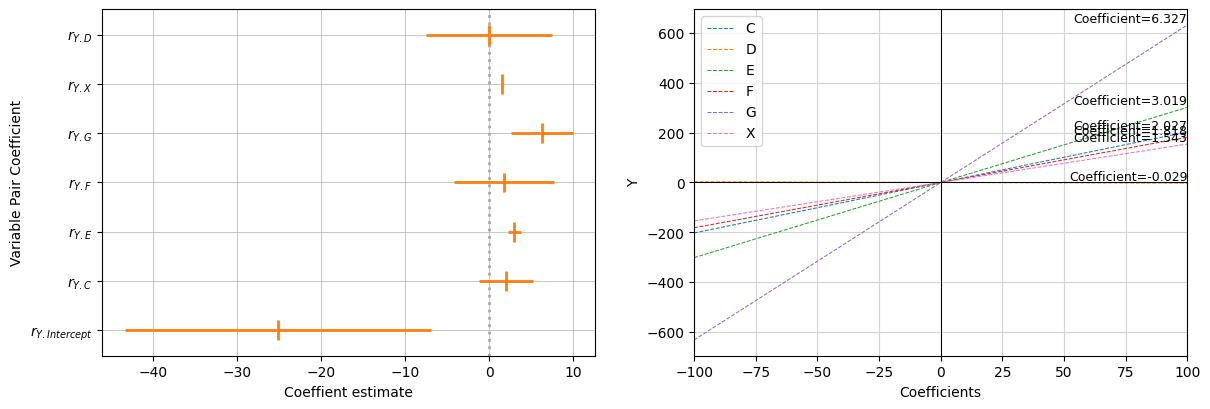

In [11]:
is_dependent, errors, ols_results = df_asthma.dependence(expression="Y ⫫̸ C, E, F, G, X, D", show_charts=True)

This is looking exactly how we would expect it. C, E, F, G and X all have clear slopes and either a negative or positive co-efficient clearly showing that if the value of those variables changes, the value of Y will be changed so Y is dependent on those variables.

However the slope for D is flat and the co-efficient is very small (just -0.029) so changing the value of D will have a negligible effect on the value of Y and hence the causal relationship $Y ⫫ D$ (Y is independent of D) exists in the data.



## Implementing Dependency in the Data in Python

The proposed method for detecting dependencis in the data uses the ols class from the statsmodels.formula.api library to perform an ordinary least squares (OLS) regression. 

The ols class can be fitted to a data set and the the co-efficients or slopes that exist in the data can be extracted and interpreted. Here is how it is done ...

In [12]:
from statsmodels.formula.api import ols

ols_formula = "Y ~ C + E + F + G + X"
ols_results = ols(ols_formula, df_asthma).fit()

ols_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     3283.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:14:06   Log-Likelihood:                -5581.7
No. Observations:                1000   AIC:                         1.118e+04
Df Residuals:                     994   BIC:                         1.120e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.1597      9.199     -2.735      0.006     -43.212      -7.107
C              2.0362      1.148      1.773      0.076      -0.217       4.289
E              3.0197      0.406      7.430      0.000       2.222       3.817
F              1.8374      1.683      1.092      0.275      -1.466       5.141
G              6.3263      1.867      3.388      0.001       2.662       9.991
X              1.5433      0.058     26.806      0.000       1.430       1.656
==============================================================================
Omnibus:                        1.063   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.588   Jarque-Bera (JB):                1.142
Skew:                           0.058   Prob(JB):                        0.565
Kurtosis:                       2.882   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The key data in the summary is the middle table which provides some analysis of the variables C, E, F, G and X in respect of their relationship with Y. For example the ols analysis is proposing the following -

$$
Y = 2.03C + 3.02E + 1.84F + 6.33G + 1.54X - 25.2
$$

and this is not too far away from the formula that I used to create the dataset which was ...

$$
Y = 3C + 3E + 2F + 2.5G + 1.5X + ε
$$

The biggest difference is for node G but for the purposes of validation the magnitude of the co-efficient is not really important, just that a co-eddicient exists and that the slope is not flat.

Apart from the ``coef`` column the other item of interest is the ``P>|t|`` or p-value column which works as follows ...

1. The null hypothesis is that there is no relationship between the variable (e.g. E) and the dependent variable (e.g. Y)
2. If the p-value is greater than the alpha (usually set at 0.05) then the null hypothesis is rejected i.e. there is a relationship i.e. there is dependence.

For example the p-values for E, G and X are all below 0.05 so the null hypothesis can be rejected and dependence can be assumed.

But what about C ad F? C has a p-value of 0.076 which is slightly above alpha abd F has a value if 0.275 which is significantly above our chosen alpha (0.05). We could just increase alpha until we conclude that all of the variables are dependent but that approach will not work very well in the long run as it will start concluding dependence where none exists.

When I did the original development I almost gave up at this point assuming that ols could not be used as a reliable method to detect dependence across my DAGs and data but then I took another look at the ols analysis.

A co-efficient can be observed for all 5 variables, but the p-value is conclusive in only 3 out of the 5. I then swapped to using the ``coef`` but further on down the line I found instances where the p-value worked but the ``coeff`` did not.

After many frustrating hours and a lot of trial-and-error I came established a method which uses both values and that exhibits a high degree of accuracy that has been rigorously tested against a lot of different data and DAGs.

Here is the method that I use to detect dependency ...


In [13]:
CONFIDENCE_LEVEL: float = 0.05 # The confidence level used when checking for statistical significance in model validation
COEFFICIENT_VALUE: float = 1.0 # The minimum coefficnet below which the relationship is considered to be "vanishing"

dependent_variable = "Y"
variables = "CEFGX"

for variable in variables:
    pvalue = ols_results.pvalues[variable]
    coefficient = ols_results.params[variable]

    if (pvalue > CONFIDENCE_LEVEL) and (abs(coefficient) <= COEFFICIENT_VALUE):
        print(f"VALIDATION FAILURE: {dependent_variable} is not dependent on {variable} in the data")
    else:
        print(f"VALIDATION SUCCESS: {dependent_variable} is dependent on {variable} in the data")


VALIDATION SUCCESS: Y is dependent on C in the data
VALIDATION SUCCESS: Y is dependent on E in the data
VALIDATION SUCCESS: Y is dependent on F in the data
VALIDATION SUCCESS: Y is dependent on G in the data
VALIDATION SUCCESS: Y is dependent on X in the data


The test I have adopted through trial and error is as follows ...

If the p-value is greated than 0.05 AND the co-efficient is less than or equal to 1.0 then assume no dependency, otherwise assume dependency.

This approach does not follow the statistical approach which would be just to consider the p-value in isolation but a significant amount of testing has suggested that it works very reliably.

## Optimising the Python Code

One drawback with the approach above is that the formula is embedded in the code i.e. in ``ols_formula = "Y ~ C + E + F + G + X"`` and also in the declarations of ``dependent_variable`` and ``variables`` and this will lead to code repetition in a real-world example.

It would be much better if a way could be found to extend the ``DataFrame`` class to be able to perform dependency tests generically on any dataset.

Fortunately it is easy to add custom methods to the ``DataFrame`` class by using a technique called "monkey patching". If you would like a step-by-step tutorial please take a look at my tutorial article ...

https://towardsdatascience.com/how-to-extend-pandas-dataframes-with-custom-methods-to-supercharge-code-functionality-readability-f4ae983ad715

Here is the optimised code that enables any depedency test to be executed against any dataset ...

In [14]:
from typing import Tuple
import re
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import RegressionResultsWrapper

DEPENDENCE_REGEX: str = r'^(.+)(\s*⊥̸|⊥|⫫̸|⫫|is_dependent_on|is_independent_of\s*)([^|]+)(?:\s*\|\s*)?(.*)?$'
VARIABLE_REGEX: str = r'[a-zA-Z0-9_ "\']+'

def dependence(self: pd.DataFrame, expression:str) -> Tuple[bool, list, RegressionResultsWrapper]:
    errors: list = []

    variable, operator, test_variables_expr, conditional_variables_expr = [match.strip() for match in re.findall(pattern=DEPENDENCE_REGEX, string=expression)[0]]

    test_variables = [test_variable.strip() for test_variable in re.findall(VARIABLE_REGEX, test_variables_expr)]
    conditional_variables = [conditional_variable.strip() for conditional_variable in re.findall(VARIABLE_REGEX, conditional_variables_expr)]

    ols_formula = f"{variable} ~ " + " + ".join(test_variables + conditional_variables)
    ols_results = ols(ols_formula, self).fit()

    for test_variable in test_variables:

        pvalue = ols_results.pvalues[test_variable]
        coefficient = ols_results.params[test_variable]

        if operator in ["⊥̸", "⫫̸", "is_dependent_on"]:
            if (pvalue > CONFIDENCE_LEVEL) and (abs(coefficient) <= COEFFICIENT_VALUE): # accept the null hypothesis (that the regresson_node is not associated with node in the data)
                errors.append(test_variable)

    return errors == [], errors, ols_results

pd.DataFrame.dependence = dependence


Once the ``DataFrame`` class has been extended with the ``dependence`` method, it is trivially easy to test any dependency test.

For example, we can try out Y ⫫̸ C, E, F, G, X which should validate as ``True`` with no errors ...

In [15]:
is_dependent, errors, ols_results = df_asthma.dependence(expression="Y ⫫̸ C, E, F, G, X")
print(is_dependent)
print(errors)
ols_results.summary()

True
[]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     3283.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        08:14:06   Log-Likelihood:                -5581.7
No. Observations:                1000   AIC:                         1.118e+04
Df Residuals:                     994   BIC:                         1.120e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.1597      9.199     -2.735      0.006     -43.212      -7.107
C              2.0362      1.148      1.773      0.076      -0.217       4.289
E              3.0197      0.406      7.430      0.000       2.222       3.817
F              1.8374      1.683      1.092      0.275      -1.466       5.141
G              6.3263      1.867      3.388      0.001       2.662       9.991
X              1.5433      0.058     26.806      0.000       1.430       1.656
==============================================================================
Omnibus:                        1.063   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.588   Jarque-Bera (JB):                1.142
Skew:                           0.058   Prob(JB):                        0.565
Kurtosis:                       2.882   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can try out Y ⫫̸ C, E, F, G, X, D which should validate as ``False`` indicating that "D" is an error because Y is not dependent on it ...

In [16]:
is_dependent, errors, ols_results = df_asthma.dependence(expression="Y ⫫̸ C, E, F, G, X, D")
print(is_dependent)
print(errors)
ols_results.summary()

False
['D']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     2733.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:10:39   Log-Likelihood:                -5581.7
No. Observations:                1000   AIC:                         1.118e+04
Df Residuals:                     993   BIC:                         1.121e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.1514      9.270     -2.713      0.007     -43.342      -6.961
C              2.0272      1.656      1.224      0.221      -1.222       5.276
E              3.0191      0.412      7.322      0.000       2.210       3.828
F              1.8185      3.031      0.600      0.549      -4.129       7.766
G              6.3267      1.869      3.385      0.001       2.659       9.994
X              1.5434      0.062     25.050      0.000       1.423       1.664
D             -0.0287      3.820     -0.008      0.994      -7.525       7.467
==============================================================================
Omnibus:                        1.063   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.588   Jarque-Bera (JB):                1.142
Skew:                           0.058   Prob(JB):                        0.565
Kurtosis:                       2.882   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

These tests both pass and the success rate is very high across all of the DAGs and datasets I have tried out to ascertain the accuracy of this approach.

## Bringing it All Together

To summarise the relatively small code-base presented above achieves an impressive outcome i.e. to enable any dependency test to be carried out on any dataset to indicate whether that test passes or not and where it fails to specifically highlight the errors.

However, more is needed. Let's assume that when we consulted our domain experts the DAG they produced contained an error and that those experts had assumed that a causal link (or dependency) existed from node D to node Y.

The proposed DAG would now look like this ...

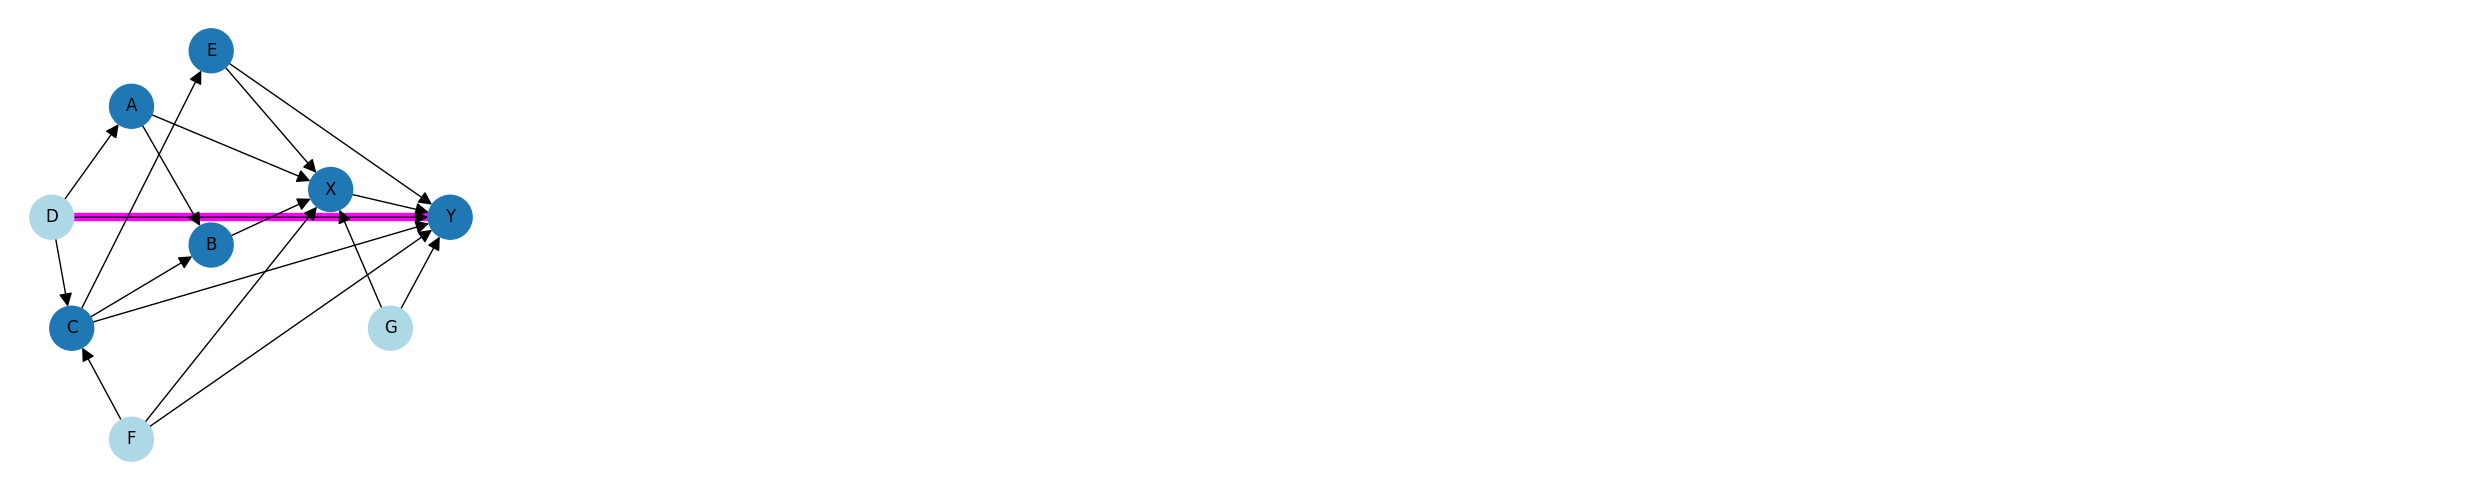

In [17]:
spurious_edge = ("D", "Y")

dag_add_dy = dag.add_edges([spurious_edge])
dag_add_dy.draw_paths([dag_add_dy.edge_to_path(spurious_edge)], cols=5)


Armed with our new capability we can easily test the DAG out for node Y as follows ...

In [18]:
is_dependent, errors, ols_results = df_asthma.dependence(expression="Y ⫫̸ C, E, F, G, X, D")

... and as we have seen in the results above node "D" will be accurately identified as an "error". We have therefore identified a "spurious edge" i.e. a link that exists in the DAG but that does not exist in the data and this tells us that the DAG must be adjusted to removed that spurious edge in order to be accurate.

It therefore follows that the following must hold ...

1. Start with a proposed DAG.
2. Iterate over all nodes.
3. Execute a dependency test for all incoming connections.
4. Accumulate a list of all errors.

The accumulated list of errors will instantly indicate all spurious edges / connections / dependencies which must be removed from the proposed DAG to produce a new DAG that is free of all spurious edges (i.e. dependencies that exist in the DAG but not in the data).

The code to achieve this is as follows ...

In [19]:
import networkx as nx

def spurious_edge_tests(dag: nx.DiGraph) -> list:

    spurious_edge_tests = {}

    for node in sorted(dag.nodes):

        parents = sorted(dag.predecessors(node))
        if parents != []:
            spurious_edge_tests[node] = f"{node} ⫫̸ " + ", ".join(parents)

    return spurious_edge_tests

def spurious_edge_errors(dag: nx.DiGraph, data: pd.DataFrame) -> list:

    all_errors = []

    for node, test in spurious_edge_tests(dag = dag).items():
        print(test)
        _, errors, _ = data.dependence(expression=test)
        all_errors.extend((error, node) for error in errors)

    return all_errors


## Testing the Full Algorithm to Detect Spurious Edges in the DAG

With these few lines of code it is now possible to test any DAG (represented by a set of edges) against any data (represented by a pandas ``DataFrame``) to see if there are any "spurious" edges in the DAG that do not exist in the data.

Let's start by testing the case where the DAG correctly represents all of the causal links in the data (remembering that ``df_asthma`` correctly represents the DAG as it was synthetically created by the author to be an exact representation) ...

In [20]:
edges = [('A', 'B'),  ('A', 'X'), ('B', 'X'), ('C', 'B'), ('C', 'E'), ('C', 'Y'), ('D', 'A'), ('D', 'C'), ('E', 'X'), ('E', 'Y'), ('F', 'C'), ('F', 'X'), ('F', 'Y'), ('G', 'X'), ('G', 'Y'), ('X', 'Y')]

errors = spurious_edge_errors(dag = nx.DiGraph(edges), data = df_asthma)
print(errors)

A ⫫̸ D
B ⫫̸ A, C
C ⫫̸ D, F
E ⫫̸ C
X ⫫̸ A, B, E, F, G
Y ⫫̸ C, E, F, G, X
[]


No errors were detected where the DAG matches the data.

Now let's add a non-existent causal link D => Y into our DAG and re-run the code ...

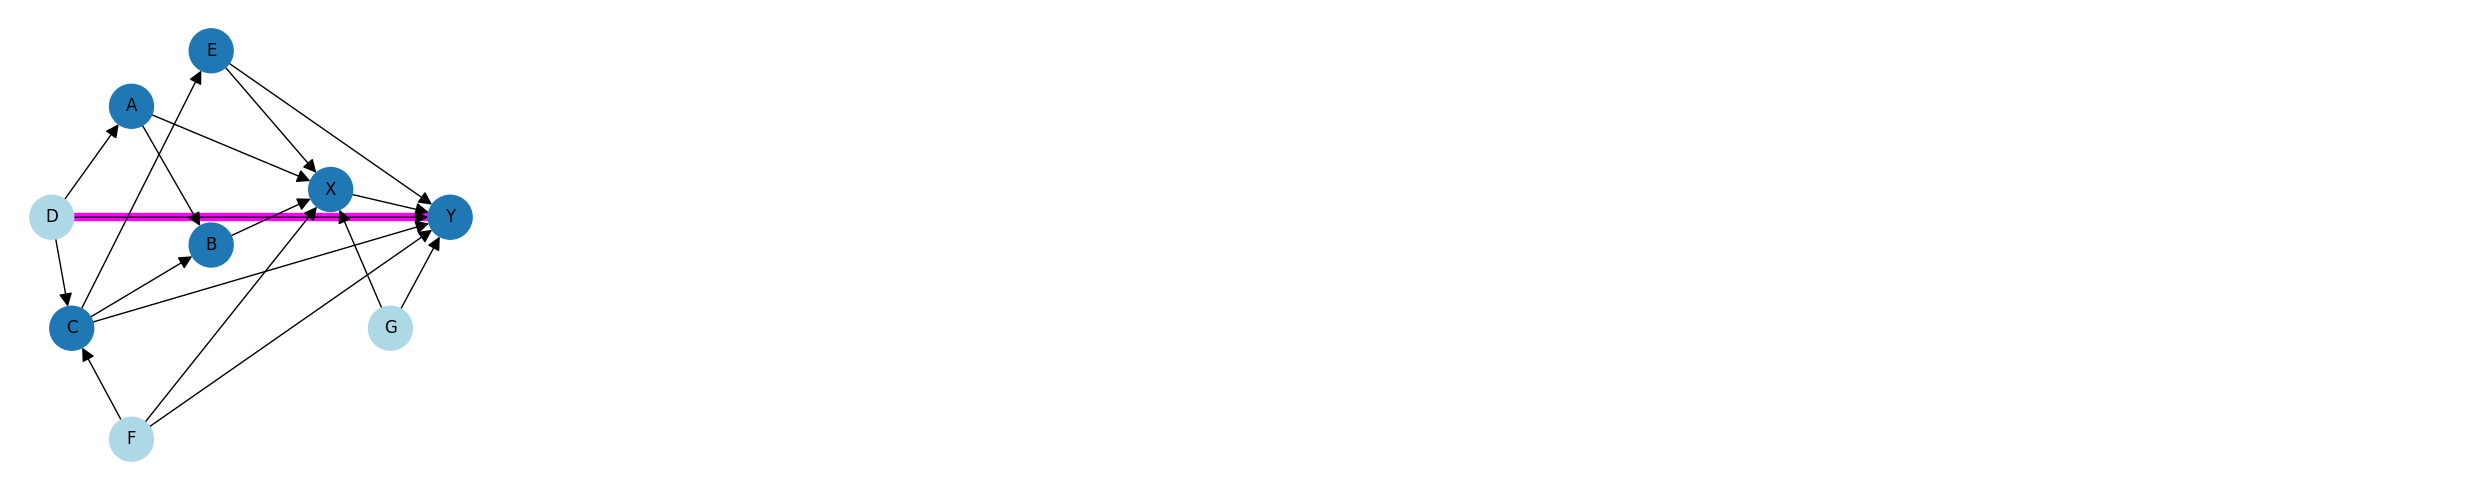

In [21]:
spurious_edges = ([("D", "Y")])
dag_spurious = dag.add_edges(edges_to_add=spurious_edges)
dag_spurious.draw_paths(paths=dag_spurious.edges_to_paths(spurious_edges), cols=5)

In [22]:
edges = [('D', 'Y'), ('A', 'B'),  ('A', 'X'), ('B', 'X'), ('C', 'B'), ('C', 'E'), ('C', 'Y'), ('D', 'A'), ('D', 'C'), ('E', 'X'), ('E', 'Y'), ('F', 'C'), ('F', 'X'), ('F', 'Y'), ('G', 'X'), ('G', 'Y'), ('X', 'Y')]

errors = spurious_edge_errors(dag = nx.DiGraph(edges), data = df_asthma)
print(errors)

A ⫫̸ D
B ⫫̸ A, C
C ⫫̸ D, F
E ⫫̸ C
X ⫫̸ A, B, E, F, G
Y ⫫̸ C, D, E, F, G, X
[('D', 'Y')]


The "spurious" edge was correctly identified in the DAG! But what about when there are multiple spurious causal relationships in the DAG that do not exist in the data? Will our algorithm still perform?

To test this out a second non-existent causal link A => E is added to the DAG ...

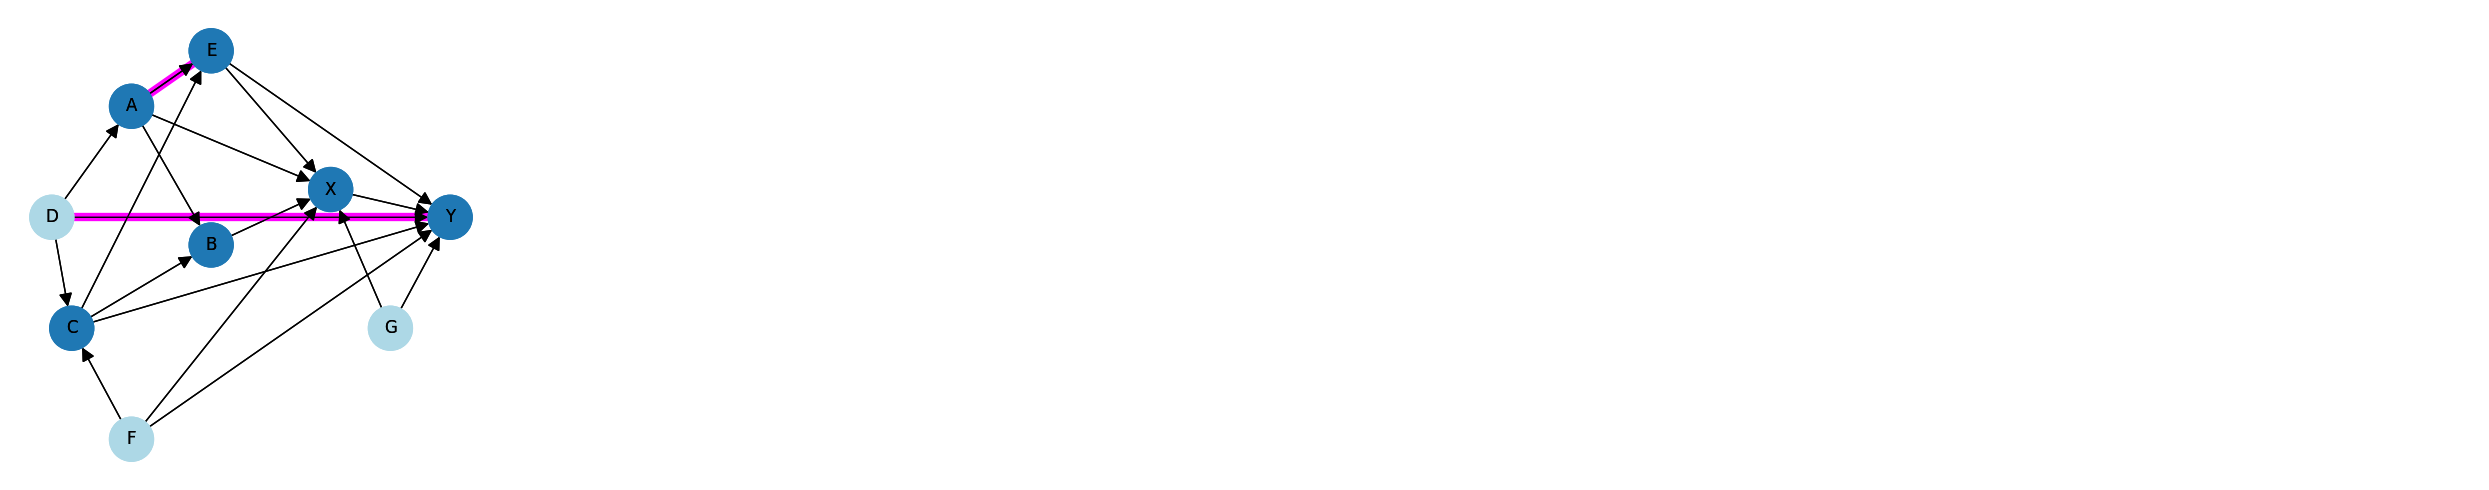

In [23]:
spurious_edges = ([('A', 'E'), ("D", "Y")])
dag_spurious = dag.add_edges(edges_to_add=spurious_edges)
dag_spurious.draw_paths(paths=dag_spurious.edges_to_paths(spurious_edges), cols=5, separate_charts=False)

In [24]:
edges = [('A', 'E'), ('D', 'Y'), ('A', 'B'),  ('A', 'X'), ('B', 'X'), ('C', 'B'), ('C', 'E'), ('C', 'Y'), ('D', 'A'), ('D', 'C'), ('E', 'X'), ('E', 'Y'), ('F', 'C'), ('F', 'X'), ('F', 'Y'), ('G', 'X'), ('G', 'Y'), ('X', 'Y')]

errors = spurious_edge_errors(dag = nx.DiGraph(edges), data = df_asthma)
print(errors)

A ⫫̸ D
B ⫫̸ A, C
C ⫫̸ D, F
E ⫫̸ A, C
X ⫫̸ A, B, E, F, G
Y ⫫̸ C, D, E, F, G, X
[('A', 'E'), ('D', 'Y')]


This test has also passed. If two spurious causal relationships are added to the DAG that do not exist in the data they are both correctly detected and identified as errors.

## Testing the Algorithm to Destruction

These promising results give rise to the question "So, just how accurate is this methods?" i.e. how many spurious causal relationships can continue to be added to the DAG before it fails to detect them correctly.

To answer this questions the author devised a challenging test that started by identfying every single valid causal link that could exist in the DAG but that does not. In the case of this particular DAG the full set of possible links looks like this ...

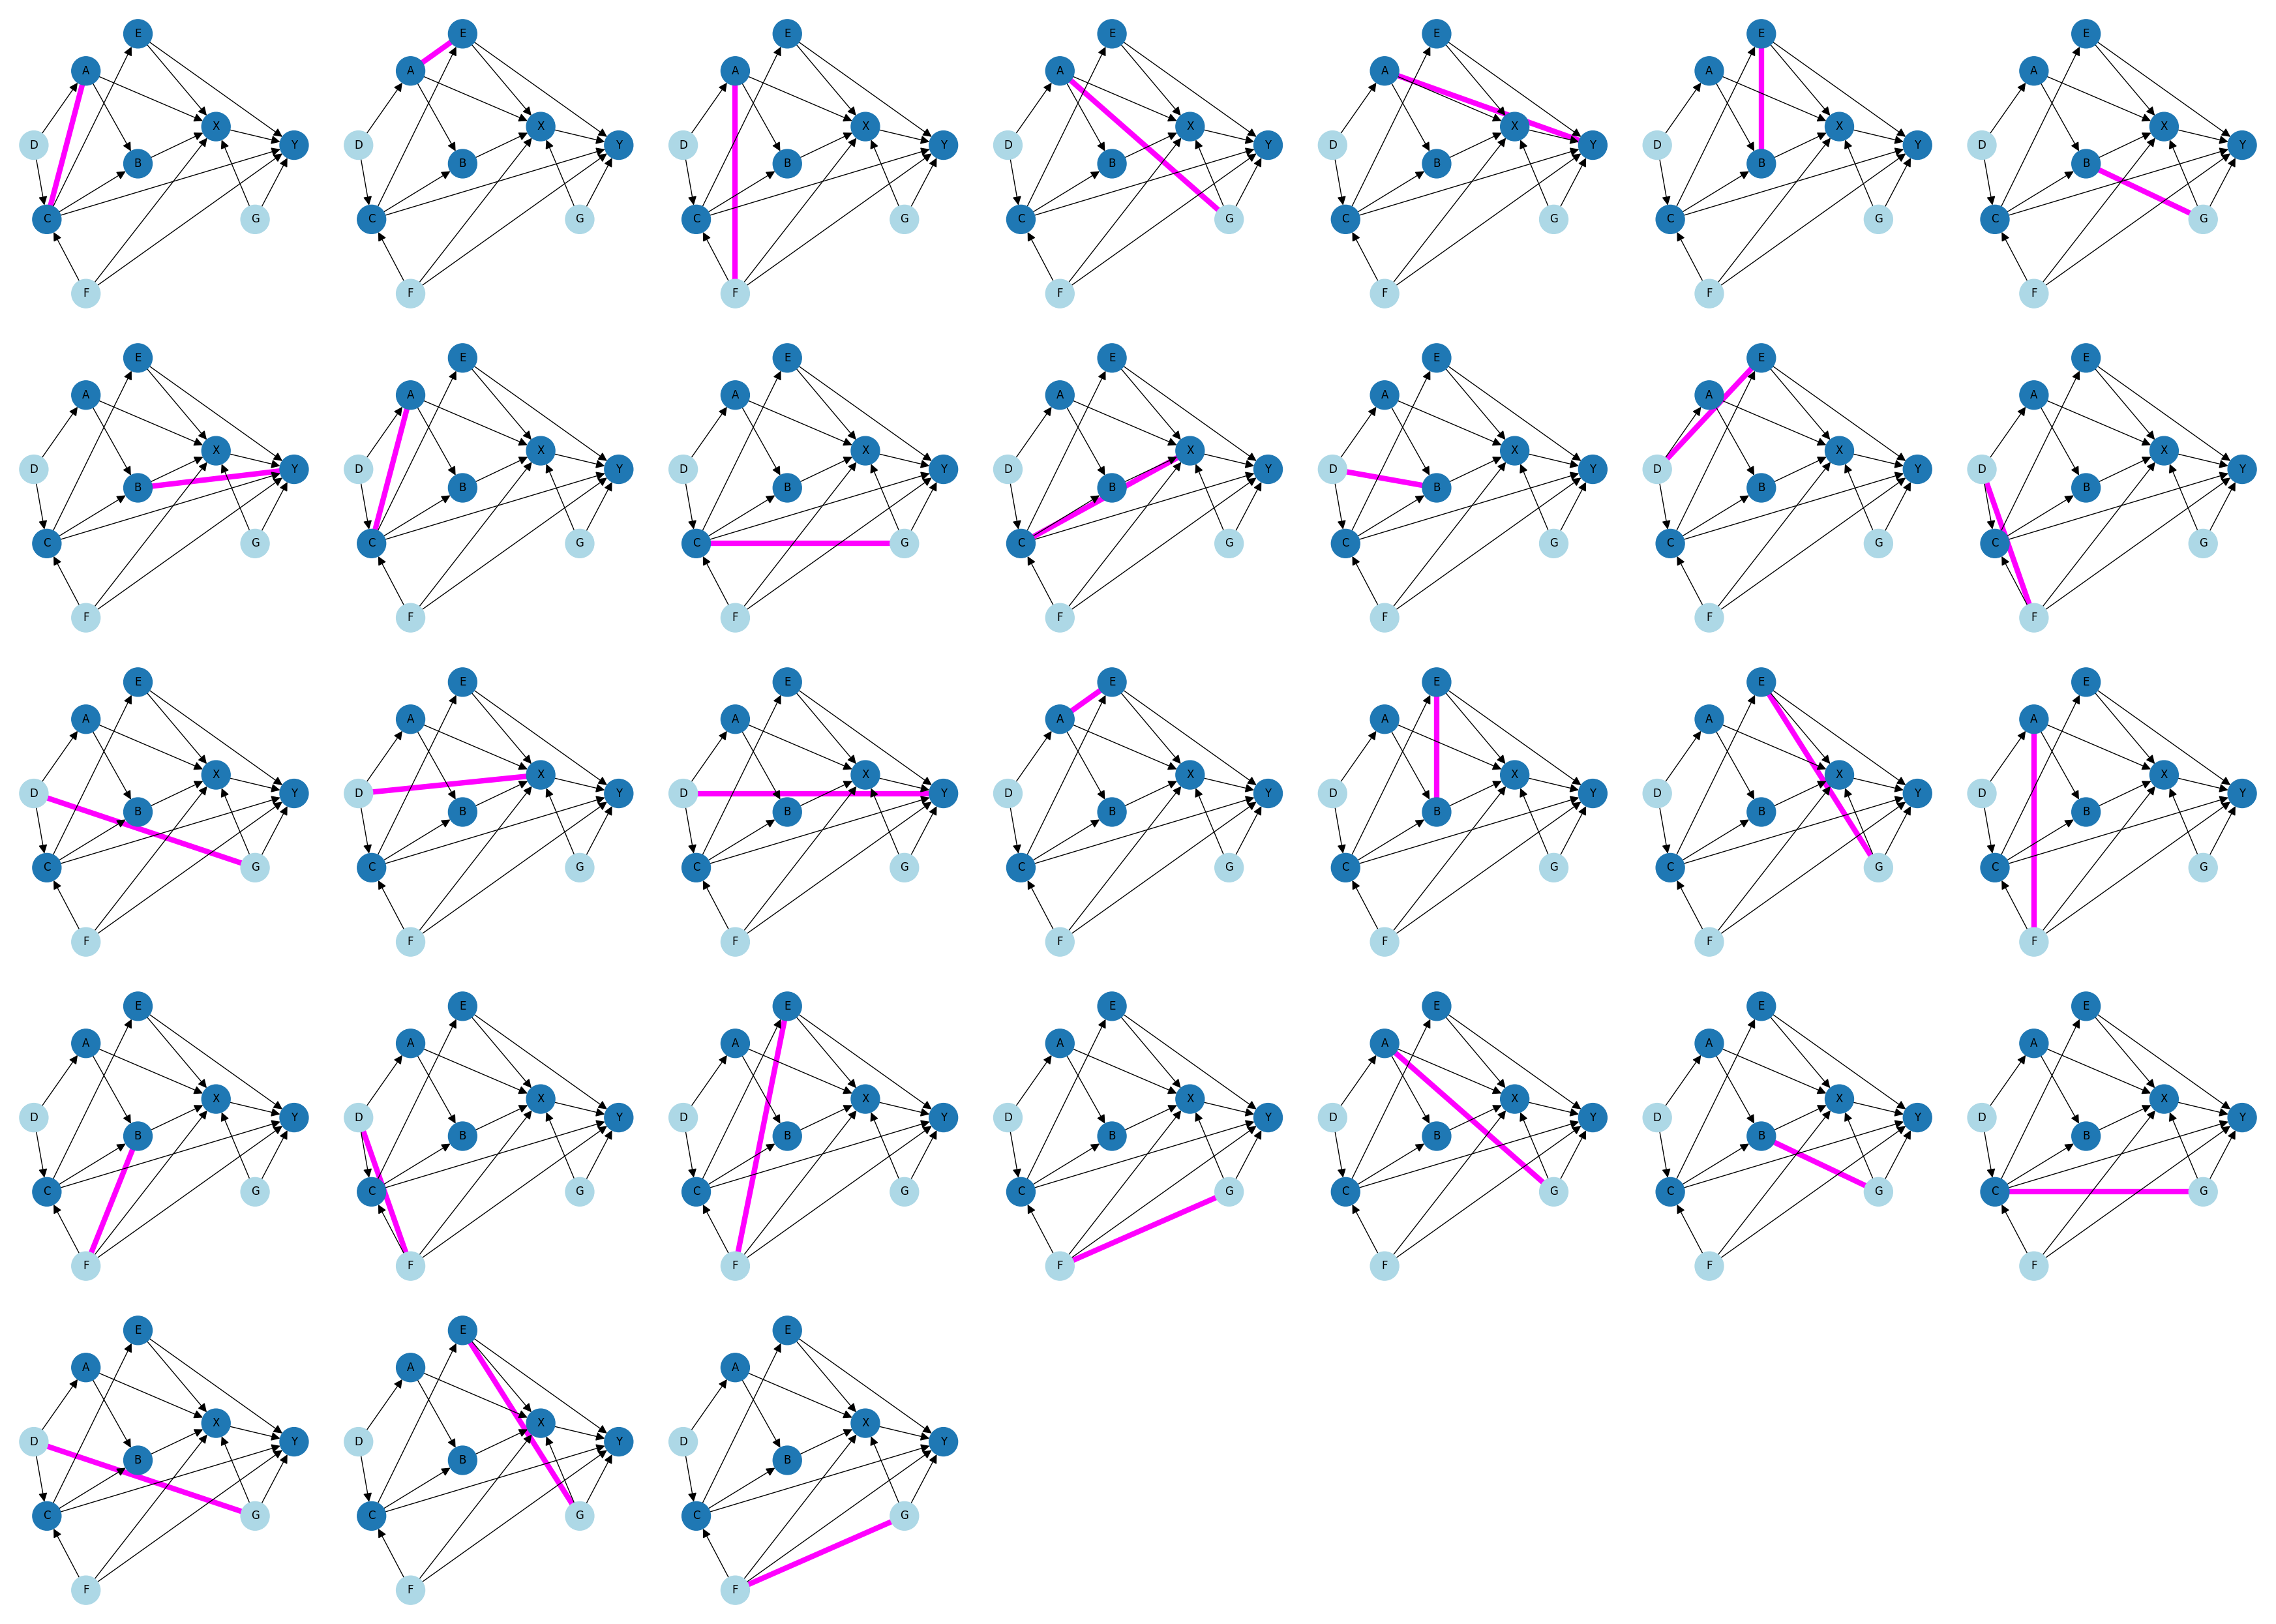

In [25]:
all_possible_missing_paths = dag.edges_to_paths(dag.all_possible_missing_edges)
dag.draw_paths(paths=all_possible_missing_paths, cols=7)

A test harness was then used to randomly select any 3 of the possible missing links at the same time, and to repeat that test for different sets in order to ascertain the accuracy of the validation algorithm.

The results are astounding. The simple algorithm presented here detects any combination of 3 spurious links (using the example DAG and data) with 100% accuracy. Even changing the test to select any 12 of the possible spurious links together produces an accuracy of 90%!

# Conclusion

The approach outlined and implemented here provides a reliable way to validate any DAG against any dataset in order to identify spurious edges i.e. causal links that the domain experts have suggested exist in the DAG but which do not actually exist in the data.

So is causal validation completely solved then? Unfortunately not as there are 3 types of errors that can exist in a DAG when compared to the data it represents and this article has only covered 1 of them. The 3 types of possible errors are -

1. Spurious Edges
2. Missing Edges
3. Reversed Edges

The 2nd and 3rd types are more complext to detect and they will be covered in detail in a set of future articles that will culminate in the aspiration of implmenting a unified algorithm that can causally validate any Directed Acyclic Graph against an associated dataset and detect any of the possible error types.

## Bonus Section: Separate vs. Combined Dependency Testing

Throughout the article the set of dependencies for a given node has been established by looking at all of the "parent" nodes and then creating a single statement of dependences, for example ...
$$
Y \dependent C, E, F, G, X
$$

You may be wondering if the same set of tests are equivalent ...

$$
Y \dependent C
$$

$$
Y \dependent E
$$

$$
Y \dependent F
$$

$$
Y \dependent G
$$

$$
Y \dependent X
$$

One of the challenges the author faced was to assume that these separate tests are equivalent to the single overall test when detecting spurious edges but trial-and-error during testing led to the firm conclusion that this is not the case.

When looking for the spurious edge Y => D the implementing the  𝑌⫫̸𝐶,𝐸,𝐹,𝐺,𝑋,𝐷
  test was 100% reliable but testing separately for  𝑌⫫̸𝐷
  does not work and this was proven by executing many rounds of automated testing to compare the accuracy of the two methods.

The assumption is that because the formula that encapsulates the relationships between these variables is  𝑌=3𝐶+3𝐸+2𝐹+2.5𝐺+1.5𝑋+ε
  the OLS test which underpins the implementation of dependency needs to consider all of the variables together and this also bears out another truism in causal inference: it is very difficult or maybe even impossible to reverse engineer a DAG from the data but when a "first stab" has been made that gets most of the way there the task becomes achievable.

The morale of this section is: consider all of the incoming relationships for each node together when testing for dependency because if they are tested separately it simply does not work.